In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# Or Over write columns names or use to narrow the columns you want to work with
#columns = ["Area","Variable Name","Year","Value",]

# Read csv with Panda
df = pd.read_csv("/Users/nataliaagudelo/Desktop/Classes/thinkful/Python_PrepCourse/Drills/Data1/aquastat_COL_VEN_clean.csv",
                 
                 #index_col=False,                                 # Force Panda to not use the fist column as the index (row names). Also if your data frame is shifte.
                 usecols =["Area","Variable Name","Year","Value"],
                 #names= columns,                                   # Rename columns inside the readign file and save typing. 
                                                                   # Outside reading file script use df.rename(columns{oldname:new name})
                                                                   # Or create variable=["Names you want for each column"], has to be a list. Then, df.columns=variable
                 #header=None,                                         #Indicate in which row header starts if necesary
                 #skiprows=2,                                      # Didn't use skip rows because my file starts at the header
                 #skipfooter=111,                                  # Skip number of rows specified at the bottom
                 #engine='python'                                  # skipfooter usually runs with C, to avoid error message
                )

df.head()


,Area,Variable Name,Year,Value
0,Colombia,Total area of the country,1982,114175.0
1,Colombia,Total area of the country,1987,114175.0
2,Colombia,Total area of the country,1992,114175.0
3,Colombia,Total area of the country,1997,114175.0
4,Colombia,Total area of the country,2002,114175.0


In [4]:
# Overall info of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 4 columns):
Area             1185 non-null object
Variable Name    1049 non-null object
Year             1049 non-null float64
Value            1044 non-null float64
dtypes: float64(2), object(2)
memory usage: 37.2+ KB


In [5]:
# Take a look at the data frame size, set up

df.shape


(1187, 4)

In [6]:
# Check for empty cells in dataframe
# Replaces True for Nan into a 1 and adds True for each column

df.isnull().sum()


Area               2
Variable Name    138
Year             138
Value            143
dtype: int64

In [7]:
# Check where the NaN are at
# It allowed me to find metadata and cells that need clean up

#df.Value.isnull()
missing_data = df[df.Value.isnull()]
missing_data.head(10)

,Area,Variable Name,Year,Value
413,Colombia,Collected municipal wastewater,1993.0,NaN
414,Colombia,Collected municipal wastewater,2005.0,NaN
417,Colombia,Treated municipal wastewater,2007.0,NaN
419,Colombia,Number of municipal wastewater treatment facil...,2002.0,NaN
424,Colombia,Treated municipal wastewater discharged (secon...,2003.0,NaN
1049,NaN,NaN,NaN,NaN
1050,Metadata:,NaN,NaN,NaN
1051,[1] [P-Observations-N] | IPCC/CRU average 1961...,NaN,NaN,NaN
1052,[2] [P-Observations-N] | IPCC/CRU average 1961...,NaN,NaN,NaN
1053,[3] [P-Observations-N] | IPCC/CRU average 1961...,NaN,NaN,NaN


In [8]:
# Slice out the part of the dataframe with clean data to work with.  Up to 1048 based on the previous table. 

df = df.loc[:1048, : ]

df.tail()


,Area,Variable Name,Year,Value
1044,Venezuela (Bolivarian Republic of),Urban population with access to safe drinking-...,2002.0,93.80
1045,Venezuela (Bolivarian Republic of),Urban population with access to safe drinking-...,2007.0,94.40
1046,Venezuela (Bolivarian Republic of),Urban population with access to safe drinking-...,2012.0,94.90
1047,Venezuela (Bolivarian Republic of),Urban population with access to safe drinking-...,2015.0,95.00
1048,Venezuela (Bolivarian Republic of),Population affected by water related disease,1995.0,22.06


In [9]:
# Check if slicing worked
df[df.Value.isnull()]

,Area,Variable Name,Year,Value
413,Colombia,Collected municipal wastewater,1993.0,NaN
414,Colombia,Collected municipal wastewater,2005.0,NaN
417,Colombia,Treated municipal wastewater,2007.0,NaN
419,Colombia,Number of municipal wastewater treatment facil...,2002.0,NaN
424,Colombia,Treated municipal wastewater discharged (secon...,2003.0,NaN


In [10]:
# Years is in float, change to int

#before = type(df.Year[0])
df["Year"] = df.Year.astype("int64")
#after = type(df.Year[0])
#print (before)
#print (after)

df.head()


/Users/nataliaagudelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Area,Variable Name,Year,Value
0,Colombia,Total area of the country,1982,114175.0
1,Colombia,Total area of the country,1987,114175.0
2,Colombia,Total area of the country,1992,114175.0
3,Colombia,Total area of the country,1997,114175.0
4,Colombia,Total area of the country,2002,114175.0


In [11]:
# Columns names with spaces create a lot of problems. Rename before anythign else
# Replace all empty spaces with underscore

df.columns = df.columns.str.replace(' ', '_') 
df.head()

,Area,Variable_Name,Year,Value
0,Colombia,Total area of the country,1982,114175.0
1,Colombia,Total area of the country,1987,114175.0
2,Colombia,Total area of the country,1992,114175.0
3,Colombia,Total area of the country,1997,114175.0
4,Colombia,Total area of the country,2002,114175.0


In [12]:
# Checking that all columns have no empty spaces in column names

df.columns 

Index(['Area', 'Variable_Name', 'Year', 'Value'], dtype='object')

In [13]:
# Replace long name for short name. Not columns but rows

df["Area"].replace("Venezuela (Bolivarian Republic of)", "Venezuela", inplace=True)
df.tail()


/Users/nataliaagudelo/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Area,Variable_Name,Year,Value
1044,Venezuela,Urban population with access to safe drinking-...,2002,93.80
1045,Venezuela,Urban population with access to safe drinking-...,2007,94.40
1046,Venezuela,Urban population with access to safe drinking-...,2012,94.90
1047,Venezuela,Urban population with access to safe drinking-...,2015,95.00
1048,Venezuela,Population affected by water related disease,1995,22.06


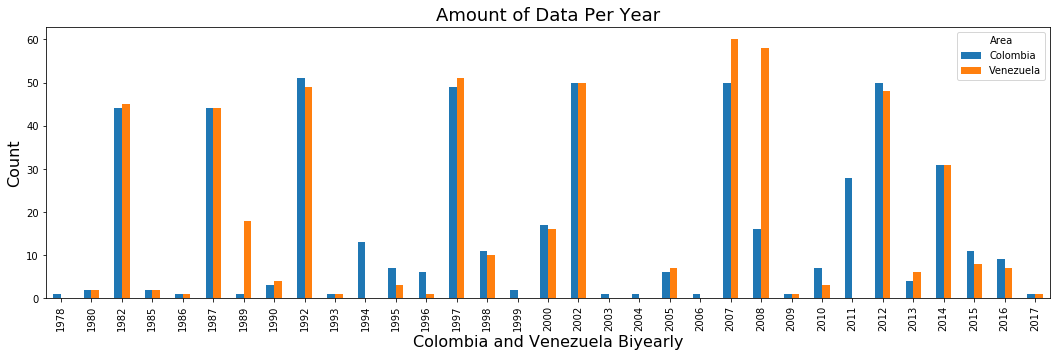

In [14]:
# Graph to look at difference of variable count for both countries

# This dataset its supposed to be yearly. Trying to find out what years were more predominant in data gathering
# This graph allows us to see specifically which years the data used its coming from for each country
# 1982, 1987,1992,197, 2002, 2007+2008, 2012, 2015

df.groupby(["Year", "Area"]).Variable_Name.count().unstack().plot(kind="bar", figsize=(18,5))
plt.xlabel("Colombia and Venezuela Biyearly", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Amount of Data Per Year", fontsize=18)
plt.show()


In [15]:
 # Group population data by area to be ploted 
    
totalpop_CO = df[(df.Area == "Colombia") & (df["Variable_Name"] == "Total population")]
#totalpop_CO
totalpop_VE = df[(df.Area == "Venezuela") & (df["Variable_Name"] == "Total population")]
totalpop_VE

,Area,Variable_Name,Year,Value
562,Venezuela,Total population,1982,16186.0
563,Venezuela,Total population,1987,18438.0
564,Venezuela,Total population,1992,20799.0
565,Venezuela,Total population,1997,23108.0
566,Venezuela,Total population,2002,25399.0
567,Venezuela,Total population,2007,27671.0
568,Venezuela,Total population,2012,29854.0
569,Venezuela,Total population,2015,31108.0


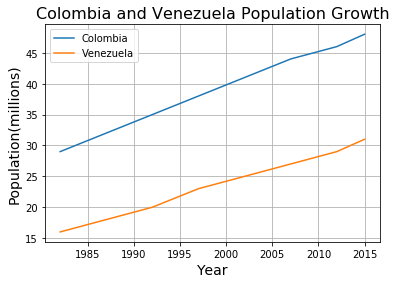

In [16]:
# Line graph of each country's population, across time.

# We see that Colombia has have higher population than Venezuela
# Whitout taking the slope, one could still discern that the rate of growth is not too different for these two countries

plt.plot(totalpop_CO.Year, totalpop_CO.Value // 10**3)
plt.plot(totalpop_VE.Year, totalpop_VE.Value // 10**3)

plt.legend(["Colombia", "Venezuela"])
plt.xlabel("Year", fontsize=14)
plt.ylabel("Population(millions)",fontsize=14)
plt.title("Colombia and Venezuela Population Growth", fontsize=16)
plt.grid()

#m = stats.slope
#b = stats.intercept
#plt.plot(x, m*x+b, color="red")

plt.show()


In [17]:
# Create subset dataframe of the information we are going to graph
# In this case, subset of the population data for each country

# Grab subset
pop_df = df[df["Variable_Name"].isin(["Total population", "Urban population", "Rural population"])]
pop_df.head()

# Use pivot_table method to create and organize dataframe
# Place variables into columns names
# Esier to query

pop_df = pop_df.pivot_table(index=["Area", "Year"],
                           columns="Variable_Name",
                           values="Value").reset_index()
pop_df.head()


Variable_Name,Area,Year,Rural population,Total population,Urban population
0,Colombia,1982,11131.0,29027.0,17896.0
1,Colombia,1987,11408.0,32324.0,20916.0
2,Colombia,1992,11572.0,35559.0,23987.0
3,Colombia,1997,11680.0,38645.0,26965.0
4,Colombia,2002,11615.0,41572.0,29957.0


In [28]:
# Replace column's names empty spaces with underscore to avoid issues

pop_df.columns = pop_df.columns.str.replace(" ", "_")

pop_df

Variable_Name,Area,Year,Rural_population,Total_population,Urban_population
0,Colombia,1982,11131.0,29027.0,17896.0
1,Colombia,1987,11408.0,32324.0,20916.0
2,Colombia,1992,11572.0,35559.0,23987.0
3,Colombia,1997,11680.0,38645.0,26965.0
4,Colombia,2002,11615.0,41572.0,29957.0
5,Colombia,2007,11371.0,44375.0,33004.0
6,Colombia,2012,10815.0,46881.0,36066.0
7,Colombia,2015,10371.0,48229.0,37858.0
8,Venezuela,1982,3333.0,16186.0,12853.0
9,Venezuela,1987,3287.0,18438.0,15151.0


In [19]:
# Using method describe() to get a sense of the range of the data
# In order to know what range to give the data in the following graph
# In this case min 16181, max 48229

pop_df.Total_population.describe()

count       16.000000
mean     31823.437500
std      10003.701848
min      16186.000000
25%      24826.250000
50%      30481.000000
75%      39376.750000
max      48229.000000
Name: Total_population, dtype: float64

In [34]:
# Stacked chart to show rural and urban population compared to total population for each country

# Go through each column and calculate percentage
pop_percent = []
for var in ["Total_population","Urban_population", "Rural_population"]:
    percentage = ((pop_df[var].divide(pop_df.Total_population))*100)
    #print (percentage)
    pop_percent.append(percentage)

# Concatenate percentage results, stacked row over row
pop_matrix = pd.concat(pop_percent, axis=1)

# Name your new columns
pop_matrix.columns =["Total_percent", "Urban_percent", "Rural_percent"]    
pop_matrix.head()

# Check type of above, you need a dataframe to be concat or merge with a nother dataframe
#type(pop_percent)

# pop_matrix is now a dataframe, concatanate with original dataframe
dfs_pop = pd.concat([pop_df, pop_matrix], axis=1)
dfs_pop


,Total_percent,Urban_percent,Rural_percent
0,100.0,61.652944,38.347056
1,100.0,64.707338,35.292662
2,100.0,67.456903,32.543097
3,100.0,69.776168,30.223832
4,100.0,72.060522,27.939478
5,100.0,74.375211,25.624789
6,100.0,76.930953,23.069047
7,100.0,78.496340,21.503660
8,100.0,79.408130,20.591870
9,100.0,82.172687,17.827313


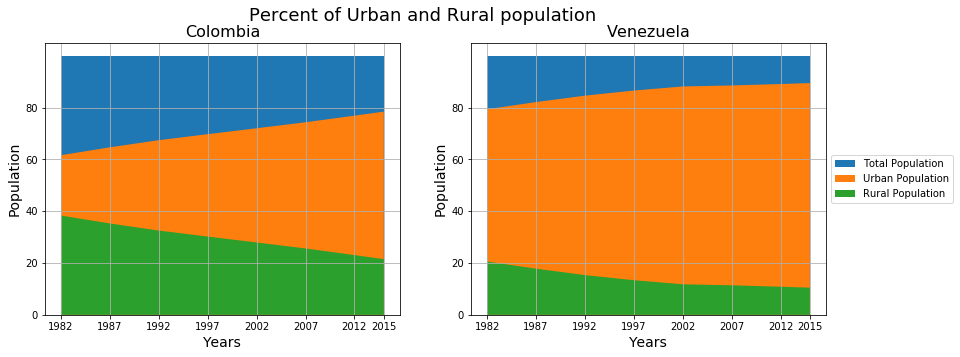

In [21]:
# Stacked chart to show rural and urban population compared to total population for each country
# Create figure stack plot graph


# Iterate through each of the columns for each specified area and year
def plot_pop(area):
    plot_df_pop = dfs_pop[pop_df.Area == area]
    years = dfs_pop.Year.unique()
    
    # Use new columns with percentage values to create graph
    for var in ["Total_percent","Urban_percent","Rural_percent"]:
        plt.stackplot(years, plot_df_pop[var])
        
    
    # Axis labels
    plt.title(area, fontsize=16)
    plt.xticks(years,years)
    plt.yticks(np.arange(0,100,20))
    plt.ylabel("Population", fontsize=14)
    plt.xlabel("Years", fontsize=14)
    
# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5), sharey=True)

# Plot 1
ax1 = plt.subplot(1,2,1)
plot_pop("Colombia")
plt.grid()

# Plot 2
ax2 = plt.subplot(1,2,2)
plot_pop("Venezuela")
plt.grid()

# Names for the whole graph
plt.suptitle("Percent of Urban and Rural population", fontsize=18)
plt.legend(("Total Population", "Urban Population", "Rural Population"), loc="center left", bbox_to_anchor=(1,0.5))



plt.show()

In [22]:
# Create subset dataframe of the information we are going to graph
# In this case, subset of the land data for each country

land_df = df[df["Variable_Name"].isin(["Total area of the country", "Arable land area", "Permanent crops area"])]

# Use pivot_table method to create and organize dataframe
# Place variables into columns names
# Esier to query

land_df = land_df.pivot_table(index=["Area", "Year"],
                           columns="Variable_Name",
                           values="Value").reset_index()
land_df.head()

Variable_Name,Area,Year,Arable land area,Permanent crops area,Total area of the country
0,Colombia,1982,3743.0,1480.0,114175.0
1,Colombia,1987,3824.0,1494.0,114175.0
2,Colombia,1992,3070.0,1830.0,114175.0
3,Colombia,1997,2539.0,1718.0,114175.0
4,Colombia,2002,2211.0,1525.0,114175.0


In [23]:
# Played with data and dividing by 10 allowed for better graphs
land_df["Total area of the country"] /=10
#land_df.head()

In [24]:
# follow previous protocol to calculate and plot percentage
# But for land data

land_percent = []
for var in ["Total area of the country","Arable land area", "Permanent crops area"]:
    percentage = ((land_df[var].divide(land_df["Total area of the country"]))*100)
    #print (percentage)
    land_percent.append(percentage)

land_matrix = pd.concat(land_percent, axis=1)

land_matrix.columns =["Total_percent", "Arable_percent", "Permanent_percent"]    
land_matrix.head()

#type(pop_percent)

dfs_land = pd.concat([land_df, land_matrix], axis=1)
dfs_land.head()

,Area,Year,Arable land area,Permanent crops area,Total area of the country,Total_percent,Arable_percent,Permanent_percent
0,Colombia,1982,3743.0,1480.0,11417.5,100.0,32.783009,12.962557
1,Colombia,1987,3824.0,1494.0,11417.5,100.0,33.492446,13.085176
2,Colombia,1992,3070.0,1830.0,11417.5,100.0,26.888548,16.028027
3,Colombia,1997,2539.0,1718.0,11417.5,100.0,22.237793,15.047077
4,Colombia,2002,2211.0,1525.0,11417.5,100.0,19.365010,13.356689


In [25]:
# Iterate through each of the columns for each specified area and year
def plot_land(area):
    plot_df2 = dfs_land[dfs_land.Area == area]
    years = plot_df2.Year.unique()
    
    # Columns to iterate through
    for var in ["Total_percent","Arable_percent", "Permanent_percent"]:
        plt.bar(years, plot_df2[var], width=2)
       
     # Axis labels
    plt.title(area, fontsize= 16)
    plt.xticks(years,years)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel("Land Area", fontsize=14)
    plt.xlabel("Years", fontsize=14)
    

In [26]:
#plot_land("Colombia")

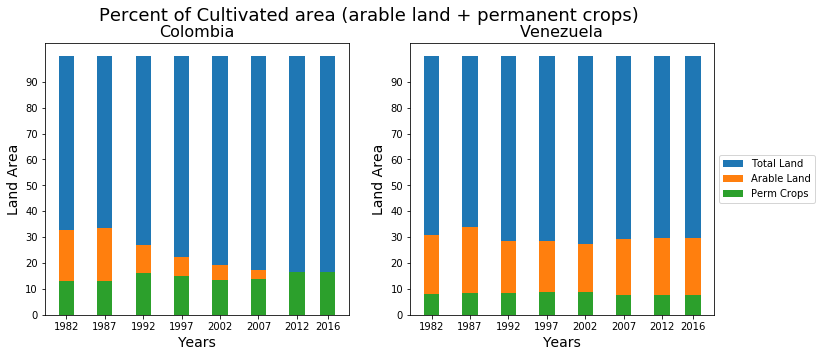

In [36]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5), sharey=True)

# Plot 1
ax1 = plt.subplot(1,2,1)
plot_land("Colombia")


# Plot 2
ax2 = plt.subplot(1,2,2)
plot_land("Venezuela")


# Names for the whole graph
plt.suptitle("Percent of Cultivated area (arable land + permanent crops)", fontsize=18)
plt.legend(("Total Land", "Arable Land", "Perm Crops"), loc="center left", bbox_to_anchor=(1,0.5))

plt.show()